In [51]:
#import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
master_df = pd.read_csv('master_df.csv', index_col = 0)

In [53]:
master_df.head()

,player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,fbld,gb,max_distance,avg_distance,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,HR/PA
0,514888,580,10.5,31.6,106.5,85.8,90.2,83.2,410,159,...,0.812,125.0,293,17,9,3,6,8,*4/D,0.033473
1,444876,553,8.3,31.1,106.2,83.5,86.5,81.9,407,154,...,0.614,67.0,196,10,8,11,5,1,*6,0.010264
2,466320,553,9.5,31.6,111.0,89.4,91.2,89.8,455,163,...,0.709,97.0,248,18,2,2,10,2,*7/D,0.021672
3,435079,549,17.4,37.5,105.5,85.6,88.6,83.2,407,189,...,0.770,112.0,267,13,3,0,5,0,*4/D,0.041237
4,519184,536,3.9,35.1,111.4,82.1,86.0,79.7,389,132,...,0.719,98.0,223,5,2,5,3,0,*789,0.005333


In [54]:
master_df.columns

Index(['player_id', 'attempts', 'avg_hit_angle', 'anglesweetspotpercent',
       'max_hit_speed', 'avg_hit_speed', 'fbld', 'gb', 'max_distance',
       'avg_distance', 'avg_hr_distance', 'ev95plus', 'ev95percent', 'barrels',
       'brl_percent', 'brl_pa', 'full_name', 'year', 'pa', 'bip', 'ba',
       'est_ba', 'est_ba_minus_ba_diff', 'slg', 'est_slg',
       'est_slg_minus_slg_diff', 'woba', 'est_woba',
       'est_woba_minus_woba_diff', 'Rk', 'Age', 'Tm', 'Lg', 'G', 'PA▼', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP',
       'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB',
       'Pos Summary', 'HR/PA'],
      dtype='object')

In [55]:
#drop the obvious variables that are note related to number of homeruns

obvious_drop = ['player_id', 'attempts', 'Rk', 'full_name', 'year', 'pa', 'bip', 'est_ba_minus_ba_diff', 'est_slg_minus_slg_diff', 'est_woba_minus_woba_diff', 'Lg', 'G', 'AB', 'R', 'H', '2B', '3B', 'BB', 'SB', 'CS', 'OPS+', 'TB', 'GDP', 'HBP', 'Pos Summary', 'ev95plus', 'barrels', 'brl_percent']

In [56]:
master_df_2 = master_df.drop(obvious_drop, axis = 1)

In [57]:
master_df_2.columns

Index(['avg_hit_angle', 'anglesweetspotpercent', 'max_hit_speed',
       'avg_hit_speed', 'fbld', 'gb', 'max_distance', 'avg_distance',
       'avg_hr_distance', 'ev95percent', 'brl_pa', 'ba', 'est_ba', 'slg',
       'est_slg', 'woba', 'est_woba', 'Age', 'Tm', 'PA▼', 'HR', 'RBI', 'SO',
       'BA', 'OBP', 'SLG', 'OPS', 'SH', 'SF', 'IBB', 'HR/PA'],
      dtype='object')

In [58]:
#eliminate any observations with HR/PA less than zero so that we can take the log transformation of it

master_df_2 = master_df_2[master_df_2['HR/PA'] > 0]

## Feature Engineering

In [60]:
master_df_2['RBI/PA'] = master_df_2['RBI'] / master_df_2['PA▼']

In [61]:
master_df_2['SO/PA'] = master_df_2['SO'] / master_df_2['PA▼']

In [62]:
master_df_2['SH/PA'] = master_df_2['SH'] / master_df_2['PA▼']

In [63]:
master_df_2['SF/PA'] = master_df_2['SF'] / master_df_2['PA▼']

In [64]:
master_df_2['IBB/PA'] = master_df_2['IBB'] / master_df_2['PA▼']

In [65]:
master_df_2['CHR_per_PA'] = master_df_2['HR'] / master_df_2['PA▼']

In [66]:
master_df_2['HR/PA'] = np.log(master_df_2['HR/PA'])

In [67]:
master_df_2.drop(['RBI', 'SO', 'SH', 'SF', 'IBB', 'PA▼'], axis = 1, inplace = True)

In [68]:
master_df_2.columns

Index(['avg_hit_angle', 'anglesweetspotpercent', 'max_hit_speed',
       'avg_hit_speed', 'fbld', 'gb', 'max_distance', 'avg_distance',
       'avg_hr_distance', 'ev95percent', 'brl_pa', 'ba', 'est_ba', 'slg',
       'est_slg', 'woba', 'est_woba', 'Age', 'Tm', 'HR', 'BA', 'OBP', 'SLG',
       'OPS', 'HR/PA', 'RBI/PA', 'SO/PA', 'SH/PA', 'SF/PA', 'IBB/PA',
       'CHR_per_PA'],
      dtype='object')

In [69]:
# list of numerical variables
num_vars = [var for var in master_df_2.columns if master_df_2[var].dtypes != 'O']

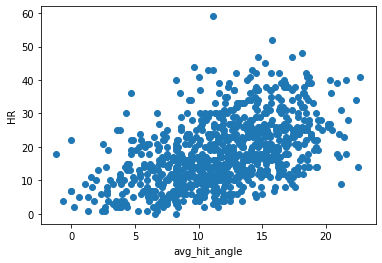

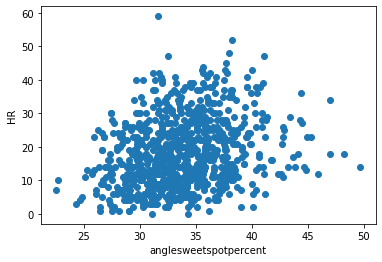

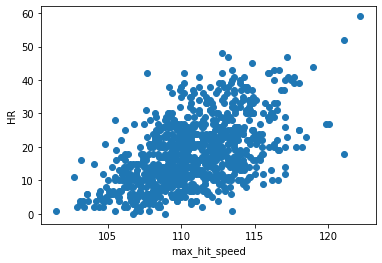

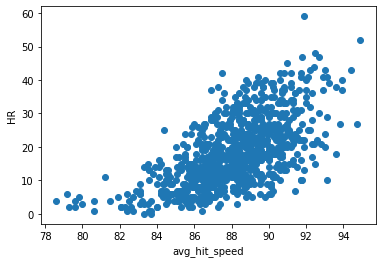

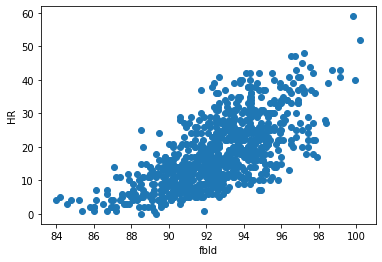

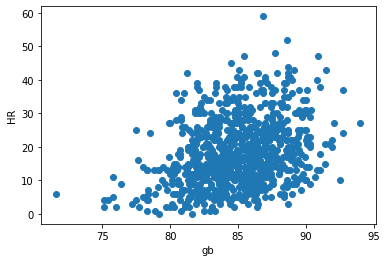

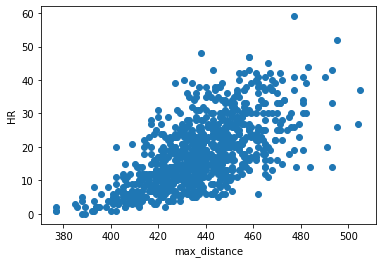

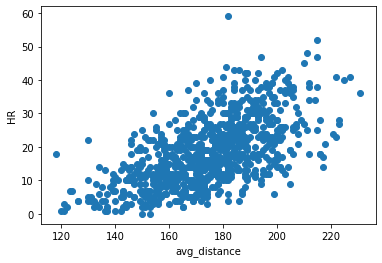

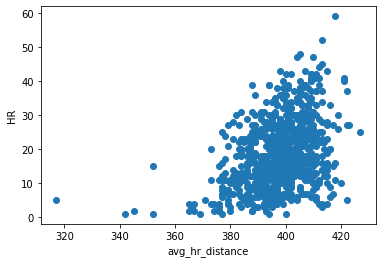

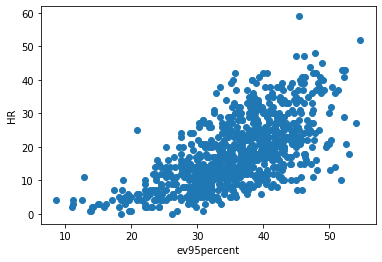

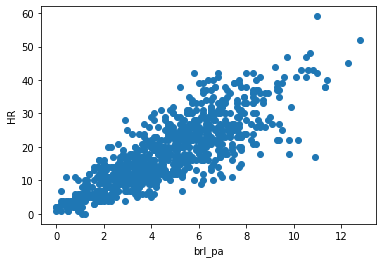

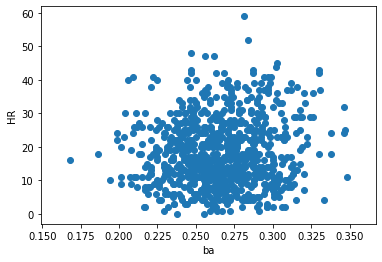

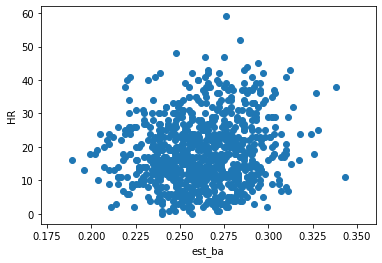

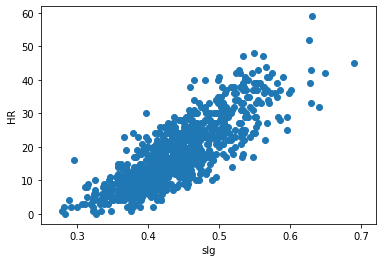

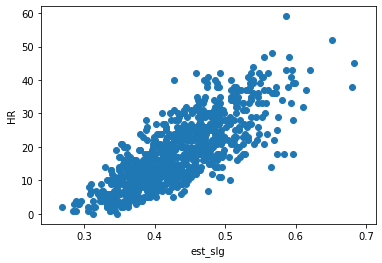

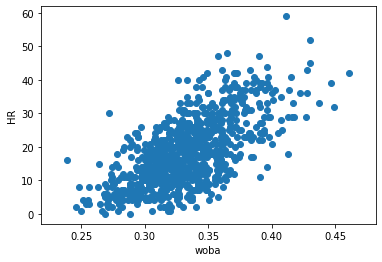

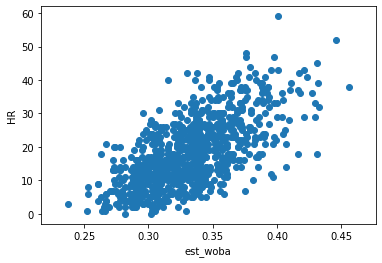

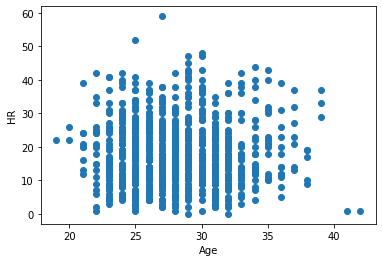

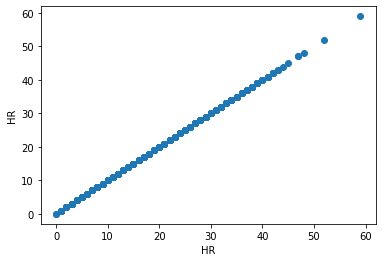

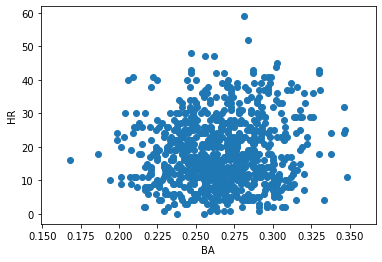

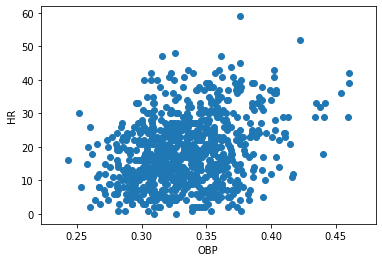

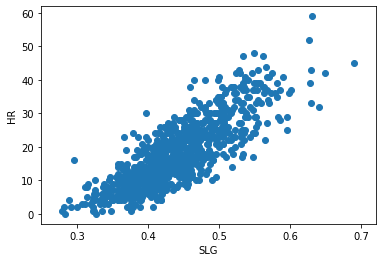

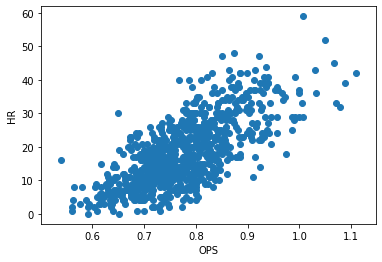

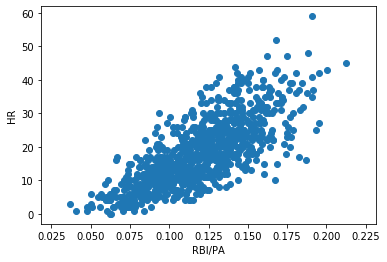

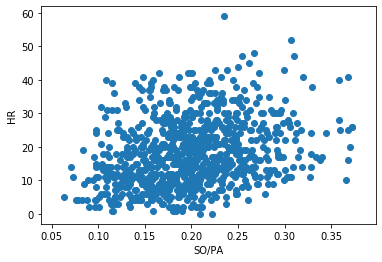

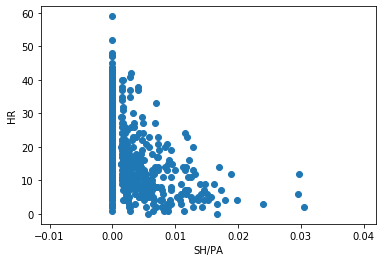

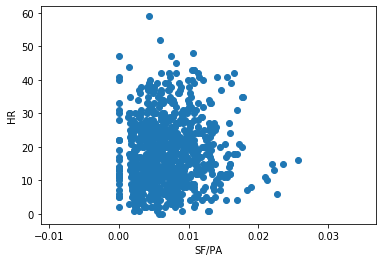

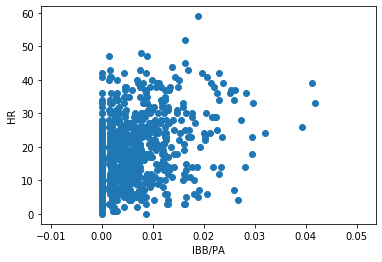

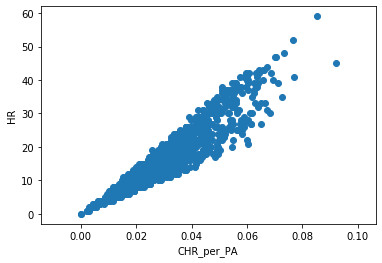

In [70]:
def transform_analyse_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
#     if 0 in df[var].unique():
#         pass
#     else:
    plt.scatter(df[var], df['HR'])
    plt.ylabel('HR')
    plt.xlabel(var)
    plt.show()
    
for var in num_vars:
    if var !='HR/PA':
        transform_analyse_continous(master_df_2, var)

In [71]:
in_depth_drop_list = ['max_hit_speed', 'gb', 'max_distance', 'avg_distance', 'BA', 'SLG']

In [72]:
master_df_3 = master_df_2.drop(in_depth_drop_list, axis = 1)

In [73]:
master_df_3.columns

Index(['avg_hit_angle', 'anglesweetspotpercent', 'avg_hit_speed', 'fbld',
       'avg_hr_distance', 'ev95percent', 'brl_pa', 'ba', 'est_ba', 'slg',
       'est_slg', 'woba', 'est_woba', 'Age', 'Tm', 'HR', 'OBP', 'OPS', 'HR/PA',
       'RBI/PA', 'SO/PA', 'SH/PA', 'SF/PA', 'IBB/PA', 'CHR_per_PA'],
      dtype='object')

In [74]:
master_df_3.shape

(856, 25)

In [75]:
#create angle sweet spot index. 1 for less than 28 degrees, 2 for between 28 and 35 degrees, 3 for more than 35 degrees
master_df_3['angle_sweet_spot_index'] = master_df_3['anglesweetspotpercent'].apply(lambda x: 1 if x < 28 else ( 2 if 28 <= x <= 35 else 3))

In [76]:
master_df_3

,avg_hit_angle,anglesweetspotpercent,avg_hit_speed,fbld,avg_hr_distance,ev95percent,brl_pa,ba,est_ba,slg,...,OBP,OPS,HR/PA,RBI/PA,SO/PA,SH/PA,SF/PA,IBB/PA,CHR_per_PA,angle_sweet_spot_index
0,10.5,31.6,85.8,90.2,386.0,28.8,2.6,0.313,0.273,0.459,...,0.353,0.812,-3.397022,0.095791,0.097242,0.004354,0.008708,0.011611,0.021771,2
1,8.3,31.1,83.5,86.5,395.0,16.1,0.8,0.257,0.273,0.320,...,0.293,0.614,-4.579120,0.070997,0.113293,0.016616,0.007553,0.001511,0.004532,2
2,9.5,31.6,89.4,91.2,398.0,36.0,1.9,0.273,0.283,0.394,...,0.314,0.709,-3.831742,0.112738,0.128843,0.002928,0.014641,0.002928,0.017570,2
3,17.4,37.5,85.6,88.6,378.0,26.2,2.4,0.296,0.280,0.428,...,0.342,0.770,-3.188417,0.108148,0.118519,0.000000,0.007407,0.000000,0.016296,3
4,3.9,35.1,82.1,86.0,367.0,14.2,0.0,0.306,0.299,0.377,...,0.342,0.719,-5.233779,0.070978,0.100946,0.007886,0.004732,0.000000,0.003155,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,17.8,33.3,89.5,97.1,404.0,44.9,7.7,0.201,0.207,0.410,...,0.259,0.669,-3.469202,0.108642,0.370370,0.000000,0.004938,0.000000,0.049383,2
199,21.6,36.5,87.8,93.3,393.0,39.2,5.6,0.222,0.199,0.419,...,0.338,0.757,-3.246720,0.152582,0.328638,0.000000,0.004695,0.000000,0.042254,3
200,9.2,38.8,90.3,95.5,402.0,45.7,4.7,0.253,0.280,0.446,...,0.318,0.763,-3.304034,0.113703,0.274052,0.000000,0.002915,0.002915,0.032070,3
201,10.1,22.7,90.6,95.4,389.0,43.0,3.7,0.194,0.204,0.325,...,0.338,0.663,-3.725693,0.071023,0.232955,0.000000,0.000000,0.000000,0.028409,1


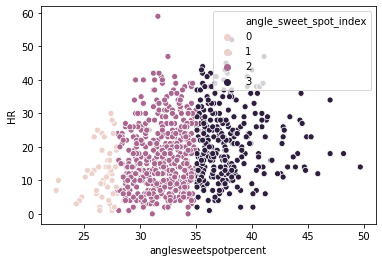

In [77]:
#use scatter plot to show range of 

sns.scatterplot(data=master_df_3, x='anglesweetspotpercent', y='HR', hue='angle_sweet_spot_index')

## Dummy Variables

In [79]:
#create dummy variables for angle sweet spot index
sweet_spot_dummies = pd.get_dummies(master_df_3.angle_sweet_spot_index, drop_first=True, prefix='AS_')

In [80]:
master_df_4 = pd.concat([master_df_3, sweet_spot_dummies], axis=1)
master_df_4.columns

Index(['avg_hit_angle', 'anglesweetspotpercent', 'avg_hit_speed', 'fbld',
       'avg_hr_distance', 'ev95percent', 'brl_pa', 'ba', 'est_ba', 'slg',
       'est_slg', 'woba', 'est_woba', 'Age', 'Tm', 'HR', 'OBP', 'OPS', 'HR/PA',
       'RBI/PA', 'SO/PA', 'SH/PA', 'SF/PA', 'IBB/PA', 'CHR_per_PA',
       'angle_sweet_spot_index', 'AS__2', 'AS__3'],
      dtype='object')

In [81]:
master_df_5 = pd.concat([master_df_4, team_dummies], axis = 1)

In [82]:
master_df_5.columns

Index(['avg_hit_angle', 'anglesweetspotpercent', 'avg_hit_speed', 'fbld',
       'avg_hr_distance', 'ev95percent', 'brl_pa', 'ba', 'est_ba', 'slg',
       'est_slg', 'woba', 'est_woba', 'Age', 'Tm', 'HR', 'OBP', 'OPS', 'HR/PA',
       'RBI/PA', 'SO/PA', 'SH/PA', 'SF/PA', 'IBB/PA', 'CHR_per_PA',
       'angle_sweet_spot_index', 'AS__2', 'AS__3', 'Tm__ATL', 'Tm__BAL',
       'Tm__BOS', 'Tm__CHC', 'Tm__CHW', 'Tm__CIN', 'Tm__CLE', 'Tm__COL',
       'Tm__DET', 'Tm__HOU', 'Tm__KCR', 'Tm__LAA', 'Tm__LAD', 'Tm__MIA',
       'Tm__MIL', 'Tm__MIN', 'Tm__NYM', 'Tm__NYY', 'Tm__OAK', 'Tm__PHI',
       'Tm__PIT', 'Tm__SDP', 'Tm__SEA', 'Tm__SFG', 'Tm__STL', 'Tm__TBR',
       'Tm__TEX', 'Tm__TOR', 'Tm__TOT', 'Tm__WSN'],
      dtype='object')

In [34]:
master_df_6 = master_df_5.drop(['Tm', 'angle_sweet_spot_index', 'anglesweetspotpercent'], axis = 1)

In [35]:
master_df_6.columns

Index(['avg_hit_angle', 'avg_hit_speed', 'fbld', 'avg_hr_distance',
       'ev95percent', 'brl_pa', 'ba', 'est_ba', 'slg', 'est_slg', 'woba',
       'est_woba', 'Age', 'HR', 'OBP', 'OPS', 'HR/PA', 'RBI/PA', 'SO/PA',
       'SH/PA', 'SF/PA', 'IBB/PA', 'CHR_per_PA', 'AS__2', 'AS__3', 'Tm__ATL',
       'Tm__BAL', 'Tm__BOS', 'Tm__CHC', 'Tm__CHW', 'Tm__CIN', 'Tm__CLE',
       'Tm__COL', 'Tm__DET', 'Tm__HOU', 'Tm__KCR', 'Tm__LAA', 'Tm__LAD',
       'Tm__MIA', 'Tm__MIL', 'Tm__MIN', 'Tm__NYM', 'Tm__NYY', 'Tm__OAK',
       'Tm__PHI', 'Tm__PIT', 'Tm__SDP', 'Tm__SEA', 'Tm__SFG', 'Tm__STL',
       'Tm__TBR', 'Tm__TEX', 'Tm__TOR', 'Tm__TOT', 'Tm__WSN'],
      dtype='object')

In [36]:
master_df_6.shape

(856, 55)

In [37]:
#fix names for 'var per PA' columns

rename_dict = {'HR/PA' : 'HR_per_PA', 'RBI/PA':'RBI_per_PA', 'SO/PA' : 'SO_per_PA', 'SH/PA': 'SH_per_PA', 
               'SF/PA': 'SF_per_PA', 'IBB/PA': 'IBB_per_PA'
    
}

In [38]:
master_df_6.rename(columns=rename_dict, inplace=True)

In [39]:
master_df_6.columns

Index(['avg_hit_angle', 'avg_hit_speed', 'fbld', 'avg_hr_distance',
       'ev95percent', 'brl_pa', 'ba', 'est_ba', 'slg', 'est_slg', 'woba',
       'est_woba', 'Age', 'HR', 'OBP', 'OPS', 'HR_per_PA', 'RBI_per_PA',
       'SO_per_PA', 'SH_per_PA', 'SF_per_PA', 'IBB_per_PA', 'CHR_per_PA',
       'AS__2', 'AS__3', 'Tm__ATL', 'Tm__BAL', 'Tm__BOS', 'Tm__CHC', 'Tm__CHW',
       'Tm__CIN', 'Tm__CLE', 'Tm__COL', 'Tm__DET', 'Tm__HOU', 'Tm__KCR',
       'Tm__LAA', 'Tm__LAD', 'Tm__MIA', 'Tm__MIL', 'Tm__MIN', 'Tm__NYM',
       'Tm__NYY', 'Tm__OAK', 'Tm__PHI', 'Tm__PIT', 'Tm__SDP', 'Tm__SEA',
       'Tm__SFG', 'Tm__STL', 'Tm__TBR', 'Tm__TEX', 'Tm__TOR', 'Tm__TOT',
       'Tm__WSN'],
      dtype='object')

In [40]:
master_df_6.dropna(inplace = True)



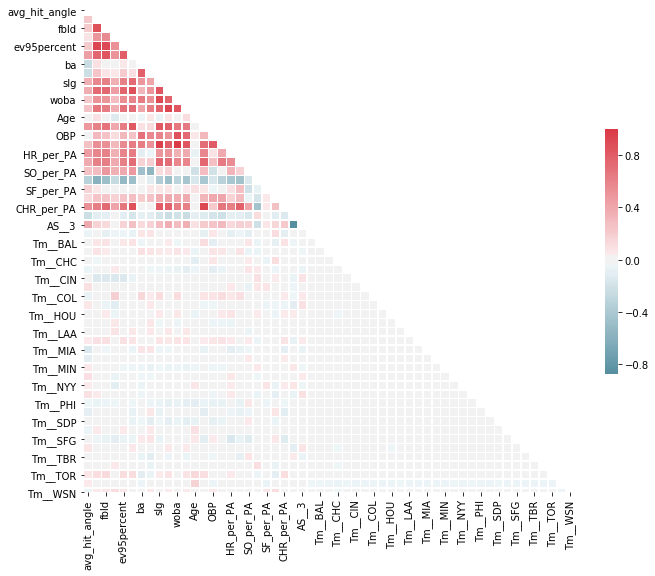

In [86]:
corr = master_df_6.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [46]:
master_df_6.to_csv('cleaned_data.csv')

In [47]:
master_df_6.columns

Index(['avg_hit_angle', 'avg_hit_speed', 'fbld', 'avg_hr_distance',
       'ev95percent', 'brl_pa', 'ba', 'est_ba', 'slg', 'est_slg', 'woba',
       'est_woba', 'Age', 'HR', 'OBP', 'OPS', 'HR_per_PA', 'RBI_per_PA',
       'SO_per_PA', 'SH_per_PA', 'SF_per_PA', 'IBB_per_PA', 'CHR_per_PA',
       'AS__2', 'AS__3', 'Tm__ATL', 'Tm__BAL', 'Tm__BOS', 'Tm__CHC', 'Tm__CHW',
       'Tm__CIN', 'Tm__CLE', 'Tm__COL', 'Tm__DET', 'Tm__HOU', 'Tm__KCR',
       'Tm__LAA', 'Tm__LAD', 'Tm__MIA', 'Tm__MIL', 'Tm__MIN', 'Tm__NYM',
       'Tm__NYY', 'Tm__OAK', 'Tm__PHI', 'Tm__PIT', 'Tm__SDP', 'Tm__SEA',
       'Tm__SFG', 'Tm__STL', 'Tm__TBR', 'Tm__TEX', 'Tm__TOR', 'Tm__TOT',
       'Tm__WSN'],
      dtype='object')